In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk                               
from nltk.corpus import twitter_samples    
import matplotlib.pyplot as plt      
import random                            
import re
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import seaborn as sns
import matplotlib.patheffects as path_effects


Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4


In [ ]:
df = pd.read_csv("df_file.csv")
df

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4


In [ ]:
df.shape

(2225, 2)

In [ ]:
df.Label.value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

In [ ]:
label_map = {
    0: 'Politics',
    1: 'Sport',
    2: 'Technology',
    3: 'Entertainment',
    4: 'Business'
}
df["label_cat"] = df['Label'].map(label_map)
df

,Text,Label,label_cat
0,Budget to set scene for election\n \n Gordon B...,0,Politics
1,Army chiefs in regiments decision\n \n Militar...,0,Politics
2,Howard denies split over ID cards\n \n Michael...,0,Politics
3,Observers to monitor UK election\n \n Minister...,0,Politics
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics
...,...,...,...
2220,India opens skies to competition\n \n India wi...,4,Business
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4,Business
2222,Survey confirms property slowdown\n \n Governm...,4,Business
2223,High fuel prices hit BA's profits\n \n British...,4,Business


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'\n', ' ', text) 
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  
    
    tokens = word_tokenize(text) 
    
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word not in stopwords.words('english')]  
    
    return ' '.join(stemmed_tokens)

df['Text_cleaned'] = df['Text'].apply(clean_text)

In [ ]:
df

,Text,Label,label_cat,Text_cleaned
0,Budget to set scene for election\n \n Gordon B...,0,Politics,budget set scene elect gordon brown seek put e...
1,Army chiefs in regiments decision\n \n Militar...,0,Politics,armi chief regiment decis militari chief expec...
2,Howard denies split over ID cards\n \n Michael...,0,Politics,howard deni split id card michael howard deni ...
3,Observers to monitor UK election\n \n Minister...,0,Politics,observ monitor uk elect minist invit intern ob...
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics,kilroy name elect seat target exchat show host...
...,...,...,...,...
2220,India opens skies to competition\n \n India wi...,4,Business,india open sky competit india allow domest com...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4,Business,yuko bankruptci us matter russian author abid ...
2222,Survey confirms property slowdown\n \n Governm...,4,Business,survey confirm properti slowdown govern figur ...
2223,High fuel prices hit BA's profits\n \n British...,4,Business,high fuel price hit ba profit british airway b...


In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

class BuildFreqs(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.tweets = None
        self.labels = None
        self.freqs = None
        

    def fit(self,X,y = None):

        self.tweets = X
        self.labels = y

        

    def transform(self,X):


        tweets = X
        ys = self.labels
        

        if type(tweets) == str:

            under_tweets = [under_tweets]


        yslist = np.squeeze(ys).tolist()

 
        freqs = {}
        for y, tweet in zip(yslist, tweets):
            for word in tweet.split(" "):
                pair = (word, y)
                if pair in freqs:
                    freqs[pair] += 1
                else:
                    freqs[pair] = 1


        if self.freqs == None:
            self.freqs = freqs


        return freqs
    


    def fit_transform(self,X,y = None):
        self.fit(X,y)

        return self.transform(X)
    



def freqs_all(freqs):


    list_of_pos_neg_total = []

    of = set([i[0] for i in list(freqs)])


    for tup in of:

        list_of_pos_neg_total.append([tup, freqs.get((tup,0),0),freqs.get((tup,1),0),freqs.get((tup,2),0),freqs.get((tup,3),0),freqs.get((tup,4),0) , freqs.get((tup,1),0)+freqs.get((tup,0),0)++freqs.get((tup,2),0)++freqs.get((tup,3),0)+freqs.get((tup,4),0)] )


        

    df_of_pos_neg_total = pd.DataFrame(list_of_pos_neg_total, columns = ["word" , "Politics_freq" , "Sport_freq", "Technology_freq", "Entertainment_freq","Business_freq" , "total_freq"]).sort_values(by="total_freq" , ascending=False).drop_duplicates()
    return df_of_pos_neg_total

label_map = {
    0: 'Politics',
    1: 'Sport',
    2: 'Technology',
    3: 'Entertainment',
    4: 'Business'
}

In [ ]:
freqs_cleaned = BuildFreqs().fit_transform(df["Text_cleaned"], list(df["Label"]))
freqs_not_cleand = BuildFreqs().fit_transform(df["Text"], list(df["Label"]))

freqs_cleaned

{('budget', 0): 109,
 ('set', 0): 143,
 ('scene', 0): 8,
 ('elect', 0): 670,
 ('gordon', 0): 107,
 ('brown', 0): 387,
 ('seek', 0): 39,
 ('put', 0): 142,
 ('economi', 0): 91,
 ('centr', 0): 48,
 ('labour', 0): 760,
 ('bid', 0): 27,
 ('third', 0): 68,
 ('term', 0): 69,
 ('power', 0): 156,
 ('deliv', 0): 65,
 ('ninth', 0): 5,
 ('1230', 0): 4,
 ('gmt', 0): 9,
 ('expect', 0): 160,
 ('stress', 0): 27,
 ('import', 0): 84,
 ('continu', 0): 94,
 ('econom', 0): 87,
 ('stabil', 0): 35,
 ('low', 0): 28,
 ('unemploy', 0): 21,
 ('interest', 0): 96,
 ('rate', 0): 63,
 ('chancellor', 0): 252,
 ('freez', 0): 11,
 ('petrol', 0): 7,
 ('duti', 0): 54,
 ('rais', 0): 88,
 ('stamp', 0): 20,
 ('threshold', 0): 17,
 ('â£60000', 0): 3,
 ('conserv', 0): 240,
 ('lib', 0): 180,
 ('dem', 0): 180,
 ('insist', 0): 102,
 ('voter', 0): 141,
 ('face', 0): 115,
 ('higher', 0): 46,
 ('tax', 0): 360,
 ('meanstest', 0): 2,
 ('treasuri', 0): 43,
 ('offici', 0): 86,
 ('said', 0): 2240,
 ('preelect', 0): 27,
 ('giveaway', 0):

In [ ]:
df_of_all_freq_cleaned = freqs_all(freqs_cleaned)
df_of_all_freq_not_cleaned = freqs_all(freqs_not_cleand)

df_of_all_freq_cleaned

,word,Politics_freq,Sport_freq,Technology_freq,Entertainment_freq,Business_freq,total_freq
23762,said,2240,941,1567,825,1680,7253
4285,mr,1718,15,510,199,603,3045
9304,year,410,444,498,594,884,2830
8913,would,1051,396,471,196,463,2577
1819,also,452,329,537,398,440,2156
...,...,...,...,...,...,...,...
11766,â£19bn,0,0,0,0,1,1
11772,edmonton,0,0,1,0,0,1
11773,â£519bn,0,0,0,0,1,1
11778,gaizka,0,1,0,0,0,1


In [ ]:
print(df_of_all_freq_cleaned.shape)
print(df_of_all_freq_not_cleaned.shape)

(24482, 7)
(69402, 7)


In [ ]:
df_of_all_freq_cleaned.sort_values(by="Politics_freq",ascending=False)

,word,Politics_freq,Sport_freq,Technology_freq,Entertainment_freq,Business_freq,total_freq
23762,said,2240,941,1567,825,1680,7253
4285,mr,1718,15,510,199,603,3045
8913,would,1051,396,471,196,463,2577
7072,labour,760,1,2,4,31,798
4156,govern,759,19,64,32,372,1246
...,...,...,...,...,...,...,...
1062,susanna,0,0,0,2,0,2
7269,powerup,0,0,2,0,0,2
7266,176m,0,1,0,0,1,2
17734,florentino,0,2,0,0,0,2


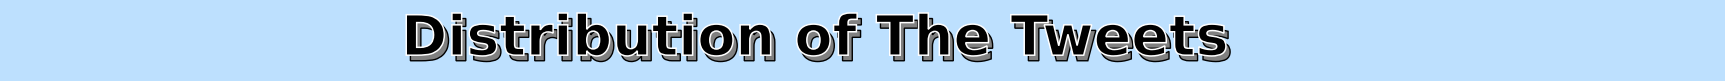

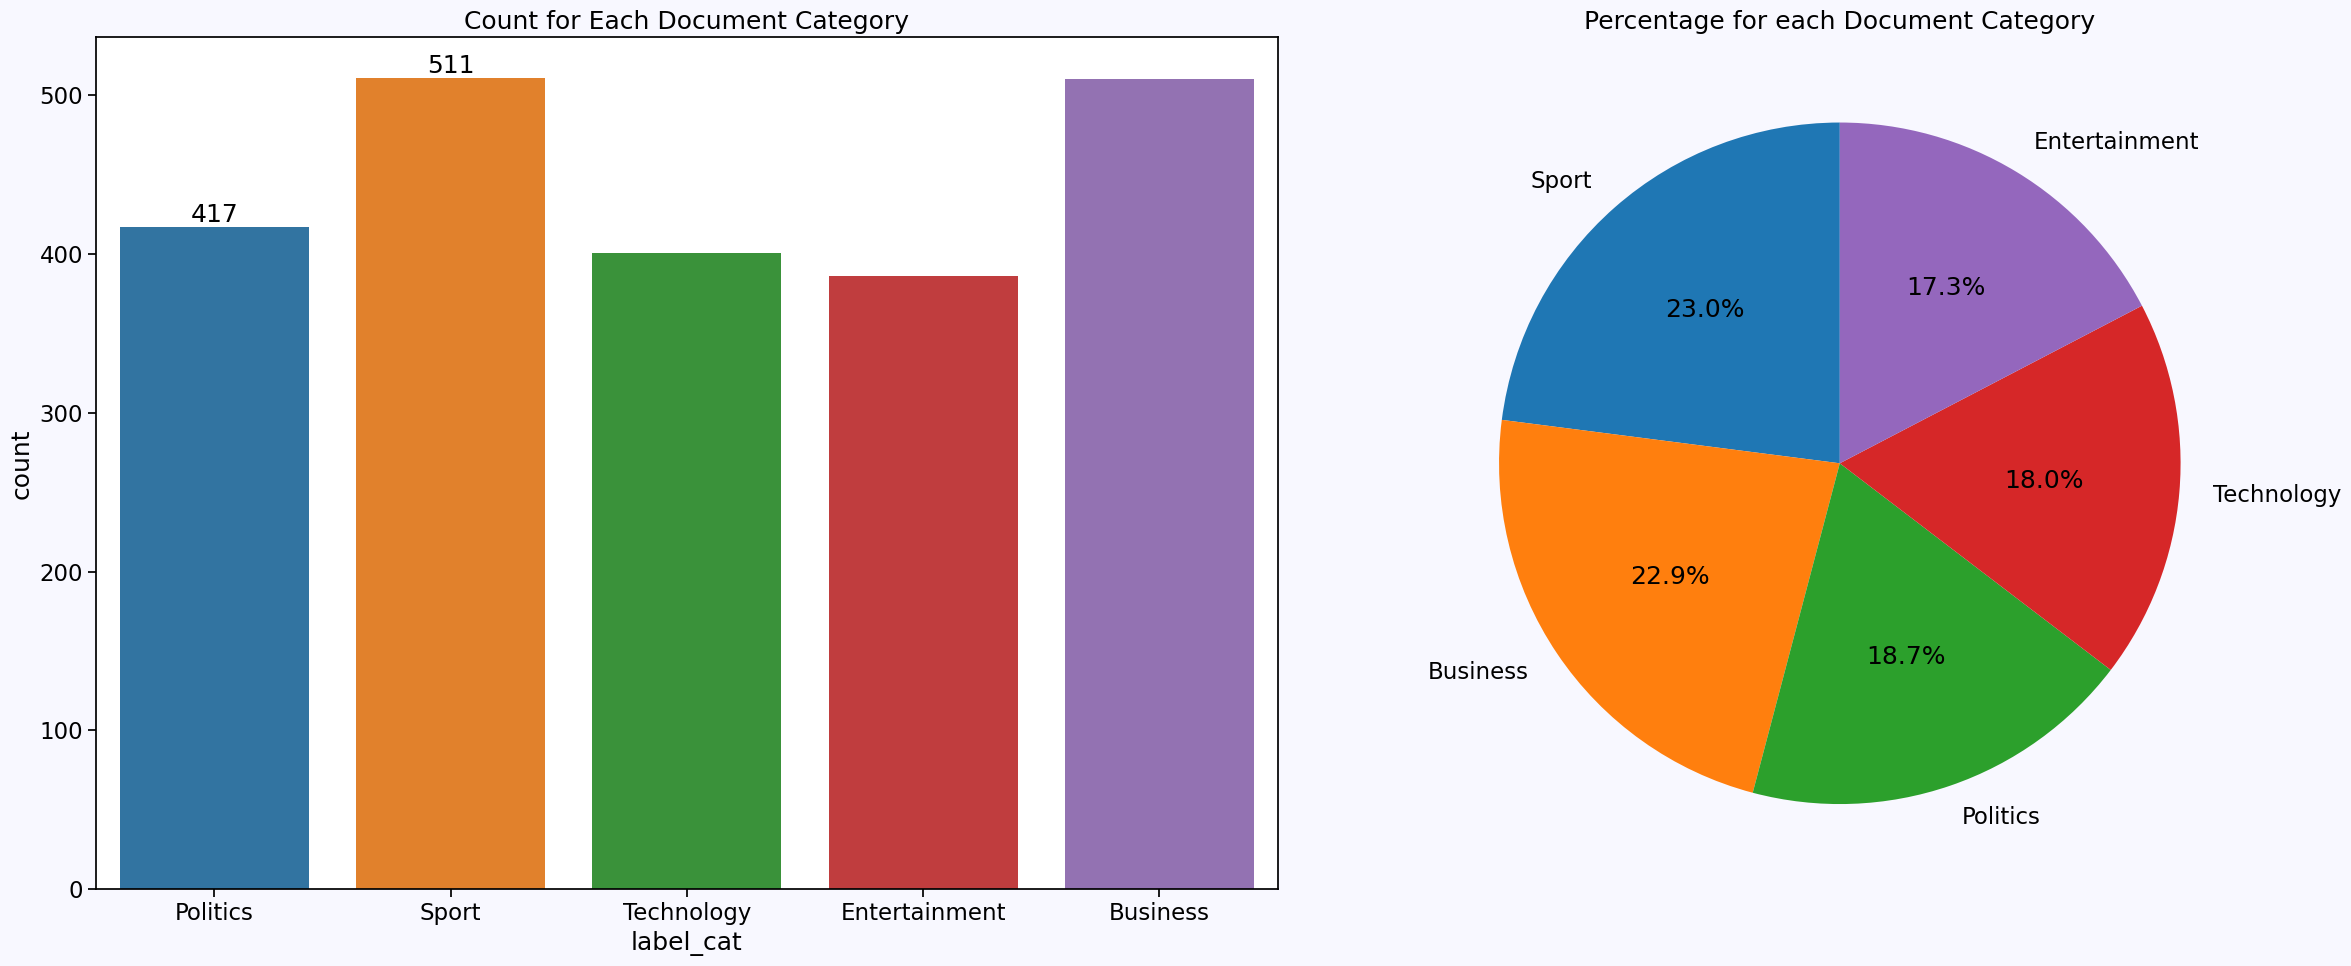

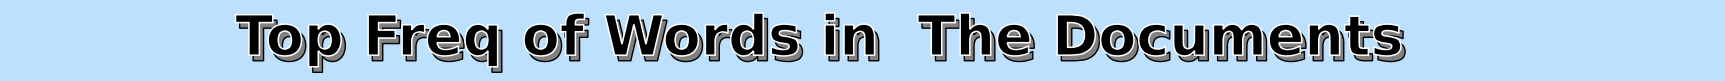

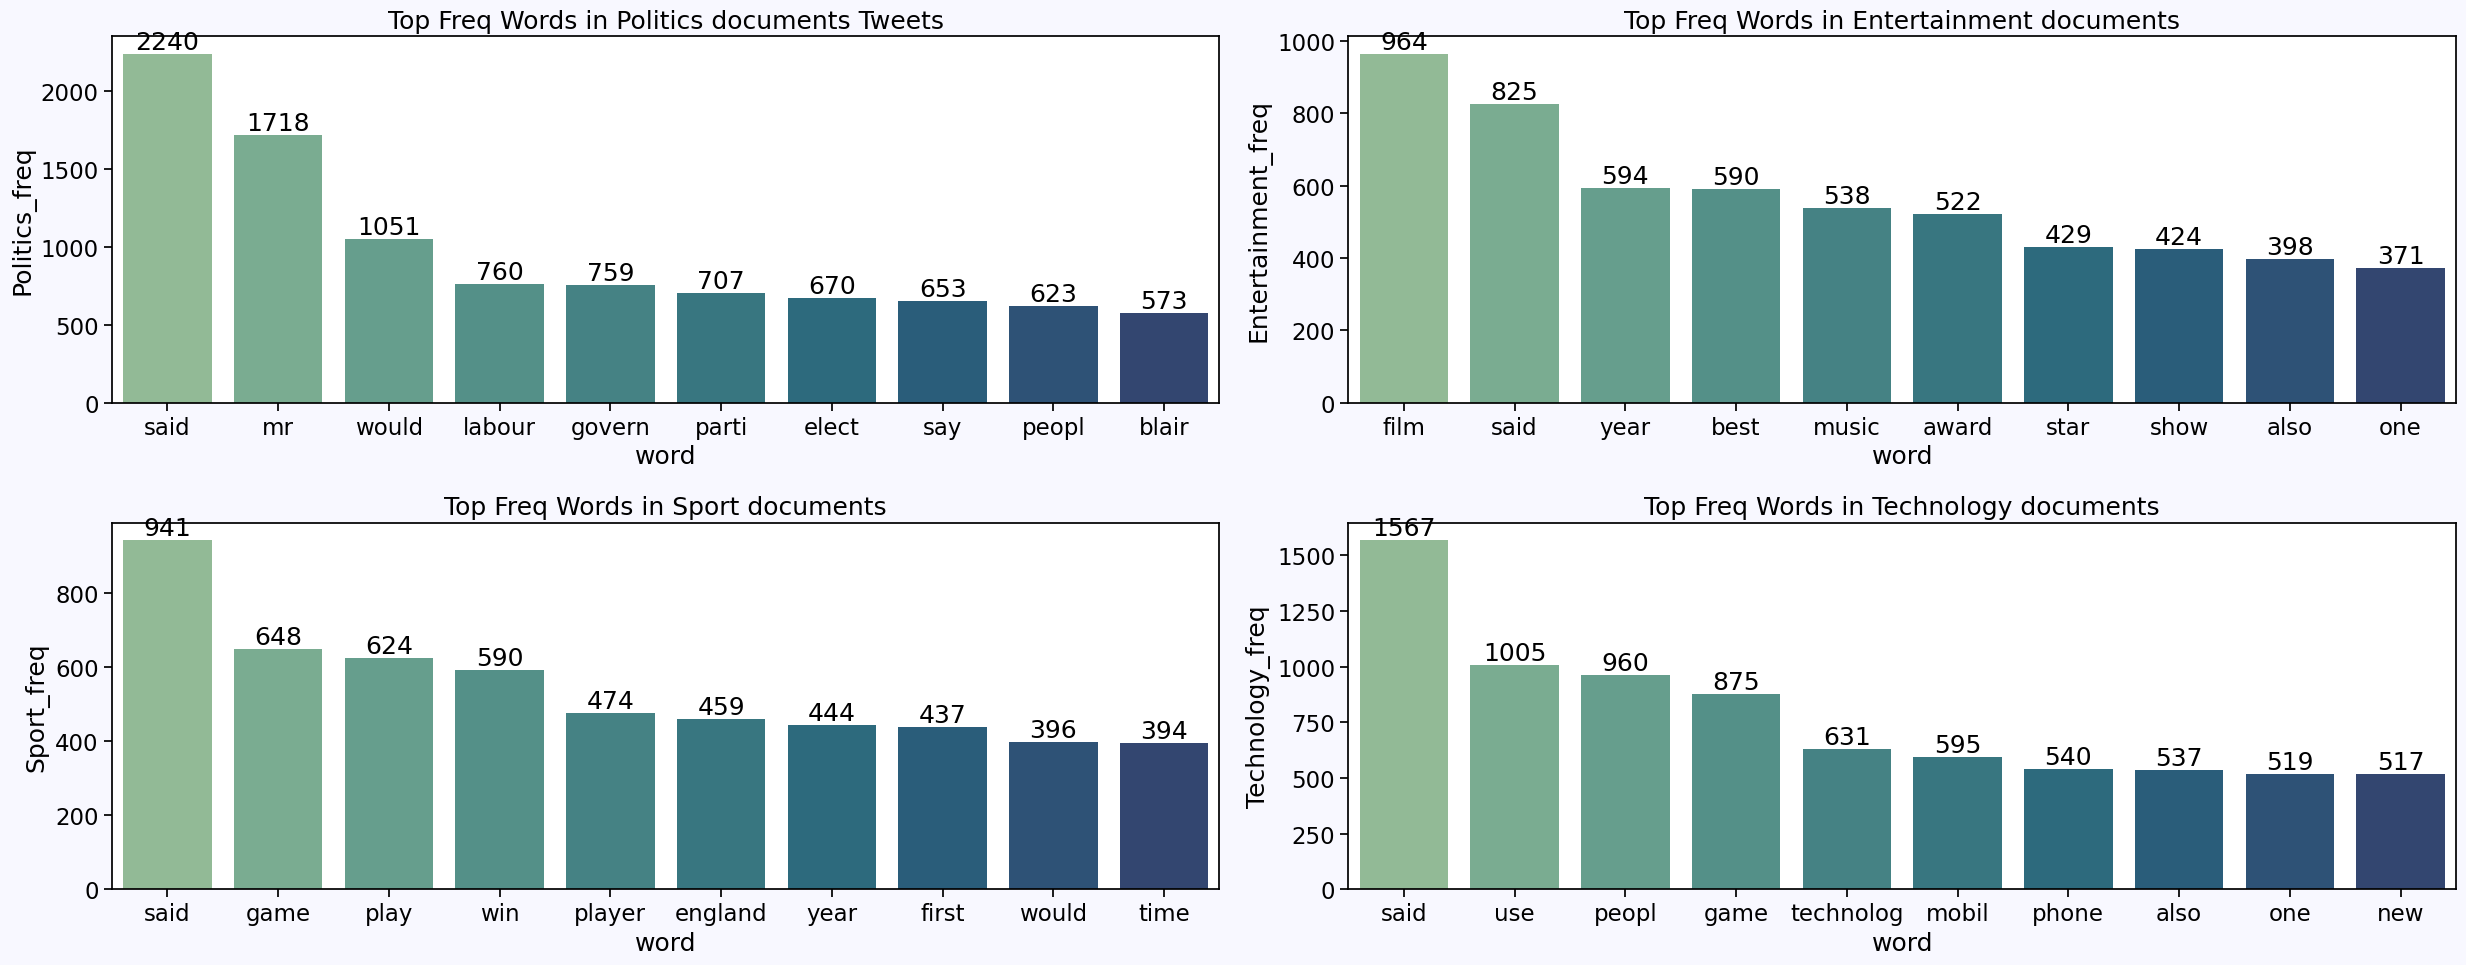

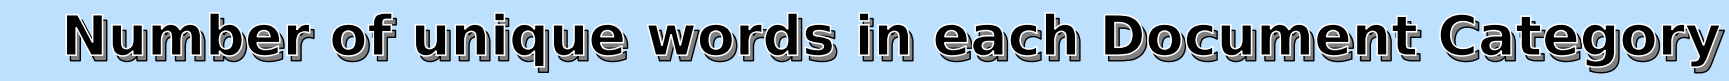

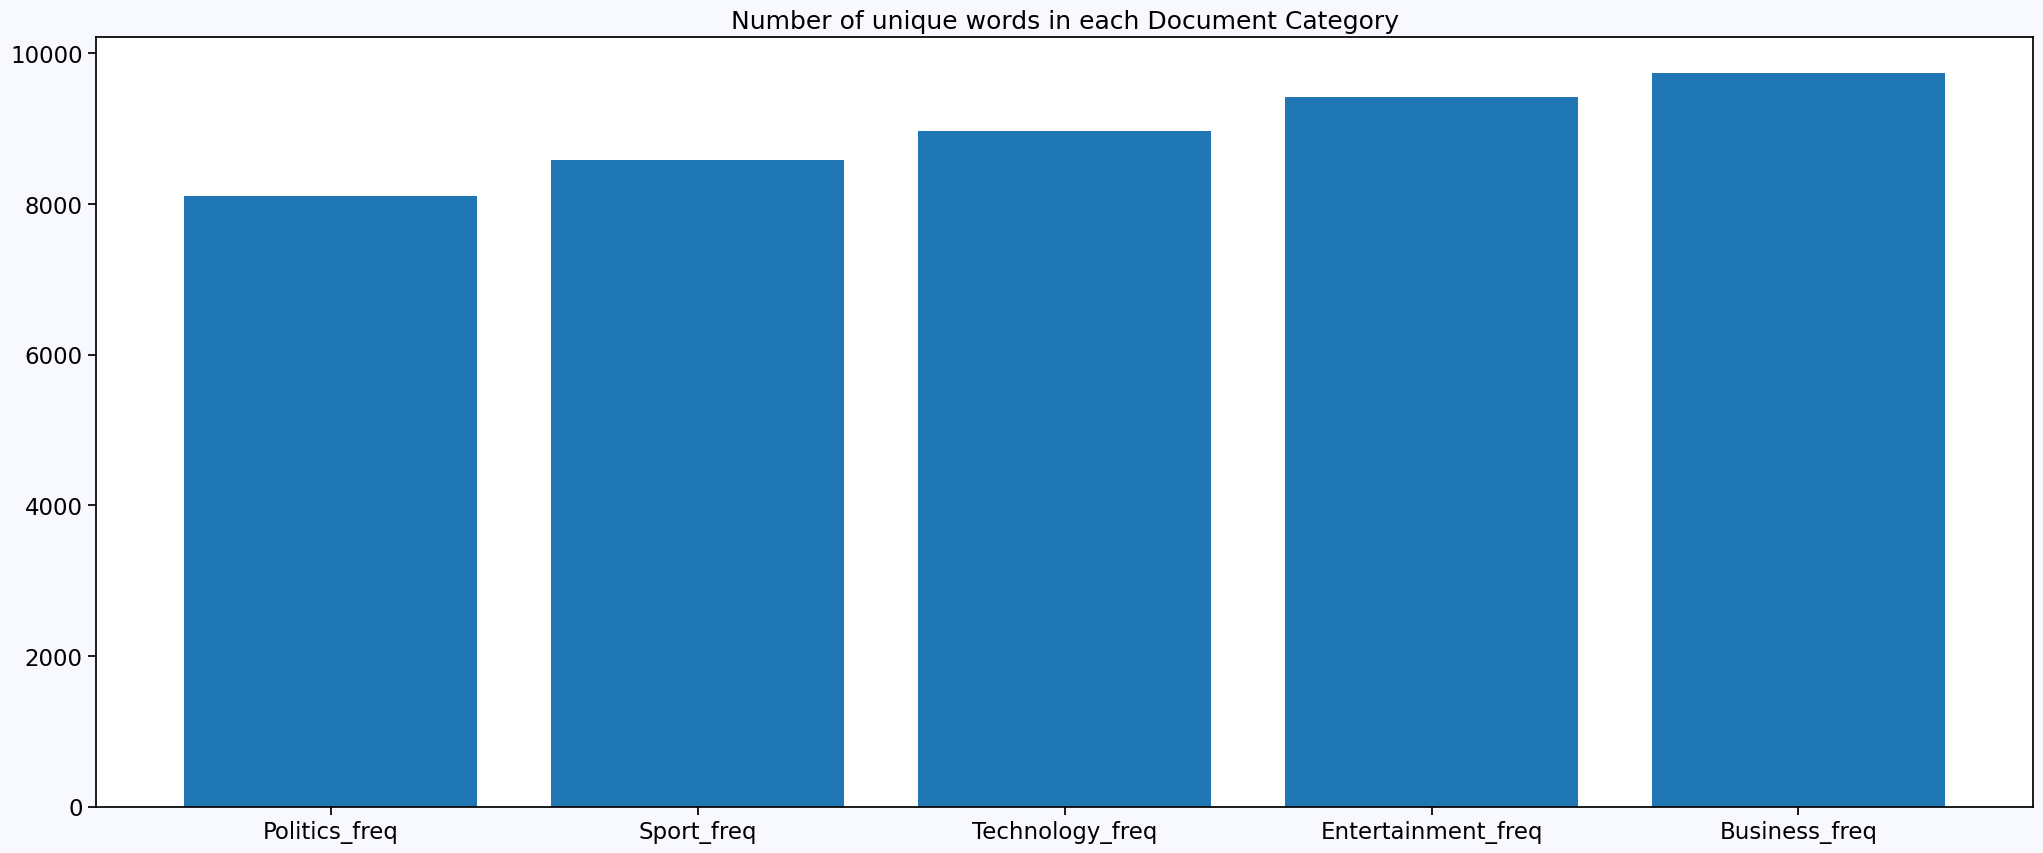

In [ ]:
def label_txt(txt,w = 0.4,h = 0.5,font_size = 40,facecolor = '#bde0fe'):
    fig = plt.figure(figsize=(22, 0.8))
    plt.axis('off')


    t = plt.text(w, h,
                txt,
                fontsize = font_size, 
                weight = 1000, 
                va ='center')
    fig.set_facecolor(facecolor)
    # hatch ='xxxx'
    t.set_path_effects([path_effects.PathPatchEffect(offset =(3, -4),
                                                   
                                                    facecolor ='gray'),
                        path_effects.PathPatchEffect(edgecolor ='white', 
                                                    linewidth = 1.1,
                                                    facecolor ='black')])
    

label_txt("       Distribution of The Tweets" , w = 0.15)

sns.set_context('notebook',font_scale= 1.5)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(1,2,figsize = (25,10))



ax = sns.countplot(x = "label_cat" , data = df , hue = "label_cat" ,ax = axs[0])

for i in range(2):
    ax.bar_label(ax.containers[i])

axs[0].set_title("Count for Each Document Category")

axs[1].pie(list(df.label_cat.value_counts().values), labels= list(df.label_cat.value_counts().index), startangle=90 , autopct='%1.1f%%' )
axs[1].set_title("Percentage for each Document Category")

plt.tight_layout()
plt.show()










label_txt("         Top Freq of Words in  The Documents " , w = 0.03)


fig, axs = plt.subplots(2,2,figsize = (25,10))


g = sns.barplot(x = "word" , y ="Politics_freq" ,palette= "crest", data=df_of_all_freq_cleaned.sort_values(by = "Politics_freq",ascending=False).head(10) , hue = "word" , ax = axs[0][0])

for i in range(10):
    g.bar_label(g.containers[i])

axs[0][0].set_title("Top Freq Words in Politics documents Tweets")





g = sns.barplot(x = "word" , y ="Entertainment_freq" ,palette= "crest", data=df_of_all_freq_cleaned.sort_values(by = "Entertainment_freq",ascending=False).head(10) , hue = "word" , ax = axs[0][1])

for i in range(10):
    g.bar_label(g.containers[i])

axs[0][1].set_title("Top Freq Words in Entertainment documents")


g = sns.barplot(x = "word" , y ="Sport_freq" ,palette= "crest", data=df_of_all_freq_cleaned.sort_values(by = "Sport_freq",ascending=False).head(10) , hue = "word" , ax = axs[1][0])

for i in range(10):
    g.bar_label(g.containers[i])

axs[1][0].set_title("Top Freq Words in Sport documents")



g = sns.barplot(x = "word" , y ="Technology_freq" ,palette= "crest", data=df_of_all_freq_cleaned.sort_values(by = "Technology_freq",ascending=False).head(10) , hue = "word" , ax = axs[1][1])

for i in range(10):
    g.bar_label(g.containers[i])

axs[1][1].set_title("Top Freq Words in Technology documents")

plt.tight_layout()
plt.show()




label_txt("Number of unique words in each Document Category" ,w = 0.03)
sns.set_context('notebook',font_scale= 1.5)
plt.rcParams['figure.facecolor'] = 'ghostwhite'
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(figsize = (25,10))

axs.bar(list(df_of_all_freq_cleaned.columns[1:][:-1]),[len(df_of_all_freq_cleaned[df_of_all_freq_cleaned["Politics_freq"] > 0].drop_duplicates()),len(df_of_all_freq_cleaned[df_of_all_freq_cleaned["Sport_freq"] > 0].drop_duplicates()),len(df_of_all_freq_cleaned[df_of_all_freq_cleaned["Technology_freq"] > 0].drop_duplicates()),len(df_of_all_freq_cleaned[df_of_all_freq_cleaned["Entertainment_freq"] > 0].drop_duplicates()),len(df_of_all_freq_cleaned[df_of_all_freq_cleaned["Business_freq"] > 0].drop_duplicates())] )
axs.set_title("Number of unique words in each Document Category")
plt.show()








In [ ]:
arr_of_top_30 = np.array(df_of_all_freq_cleaned.sort_values(by = "total_freq", ascending=False)[:30])
arr_of_top_30

array([['said', 2240, 941, 1567, 825, 1680, 7253],
       ['mr', 1718, 15, 510, 199, 603, 3045],
       ['year', 410, 444, 498, 594, 884, 2830],
       ['would', 1051, 396, 471, 196, 463, 2577],
       ['also', 452, 329, 537, 398, 440, 2156],
       ['peopl', 623, 86, 960, 206, 169, 2044],
       ['new', 430, 285, 517, 322, 416, 1970],
       ['us', 167, 210, 363, 367, 801, 1908],
       ['one', 309, 359, 519, 371, 251, 1809],
       ['game', 38, 648, 875, 45, 34, 1640],
       ['say', 653, 181, 343, 128, 284, 1589],
       ['use', 234, 112, 1005, 83, 127, 1561],
       ['could', 384, 241, 469, 105, 311, 1510],
       ['time', 293, 394, 362, 212, 226, 1487],
       ['last', 208, 382, 187, 259, 368, 1404],
       ['make', 290, 238, 455, 188, 204, 1375],
       ['first', 178, 437, 252, 251, 165, 1283],
       ['govern', 759, 19, 64, 32, 372, 1246],
       ['like', 228, 231, 448, 159, 159, 1225],
       ['go', 273, 369, 295, 162, 123, 1222],
       ['world', 122, 386, 314, 139, 253, 1214]

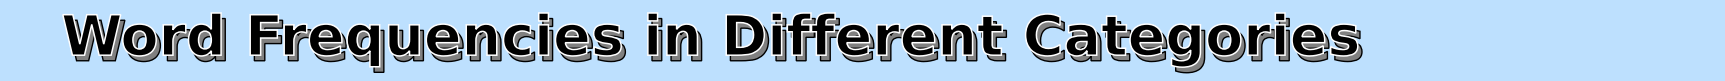

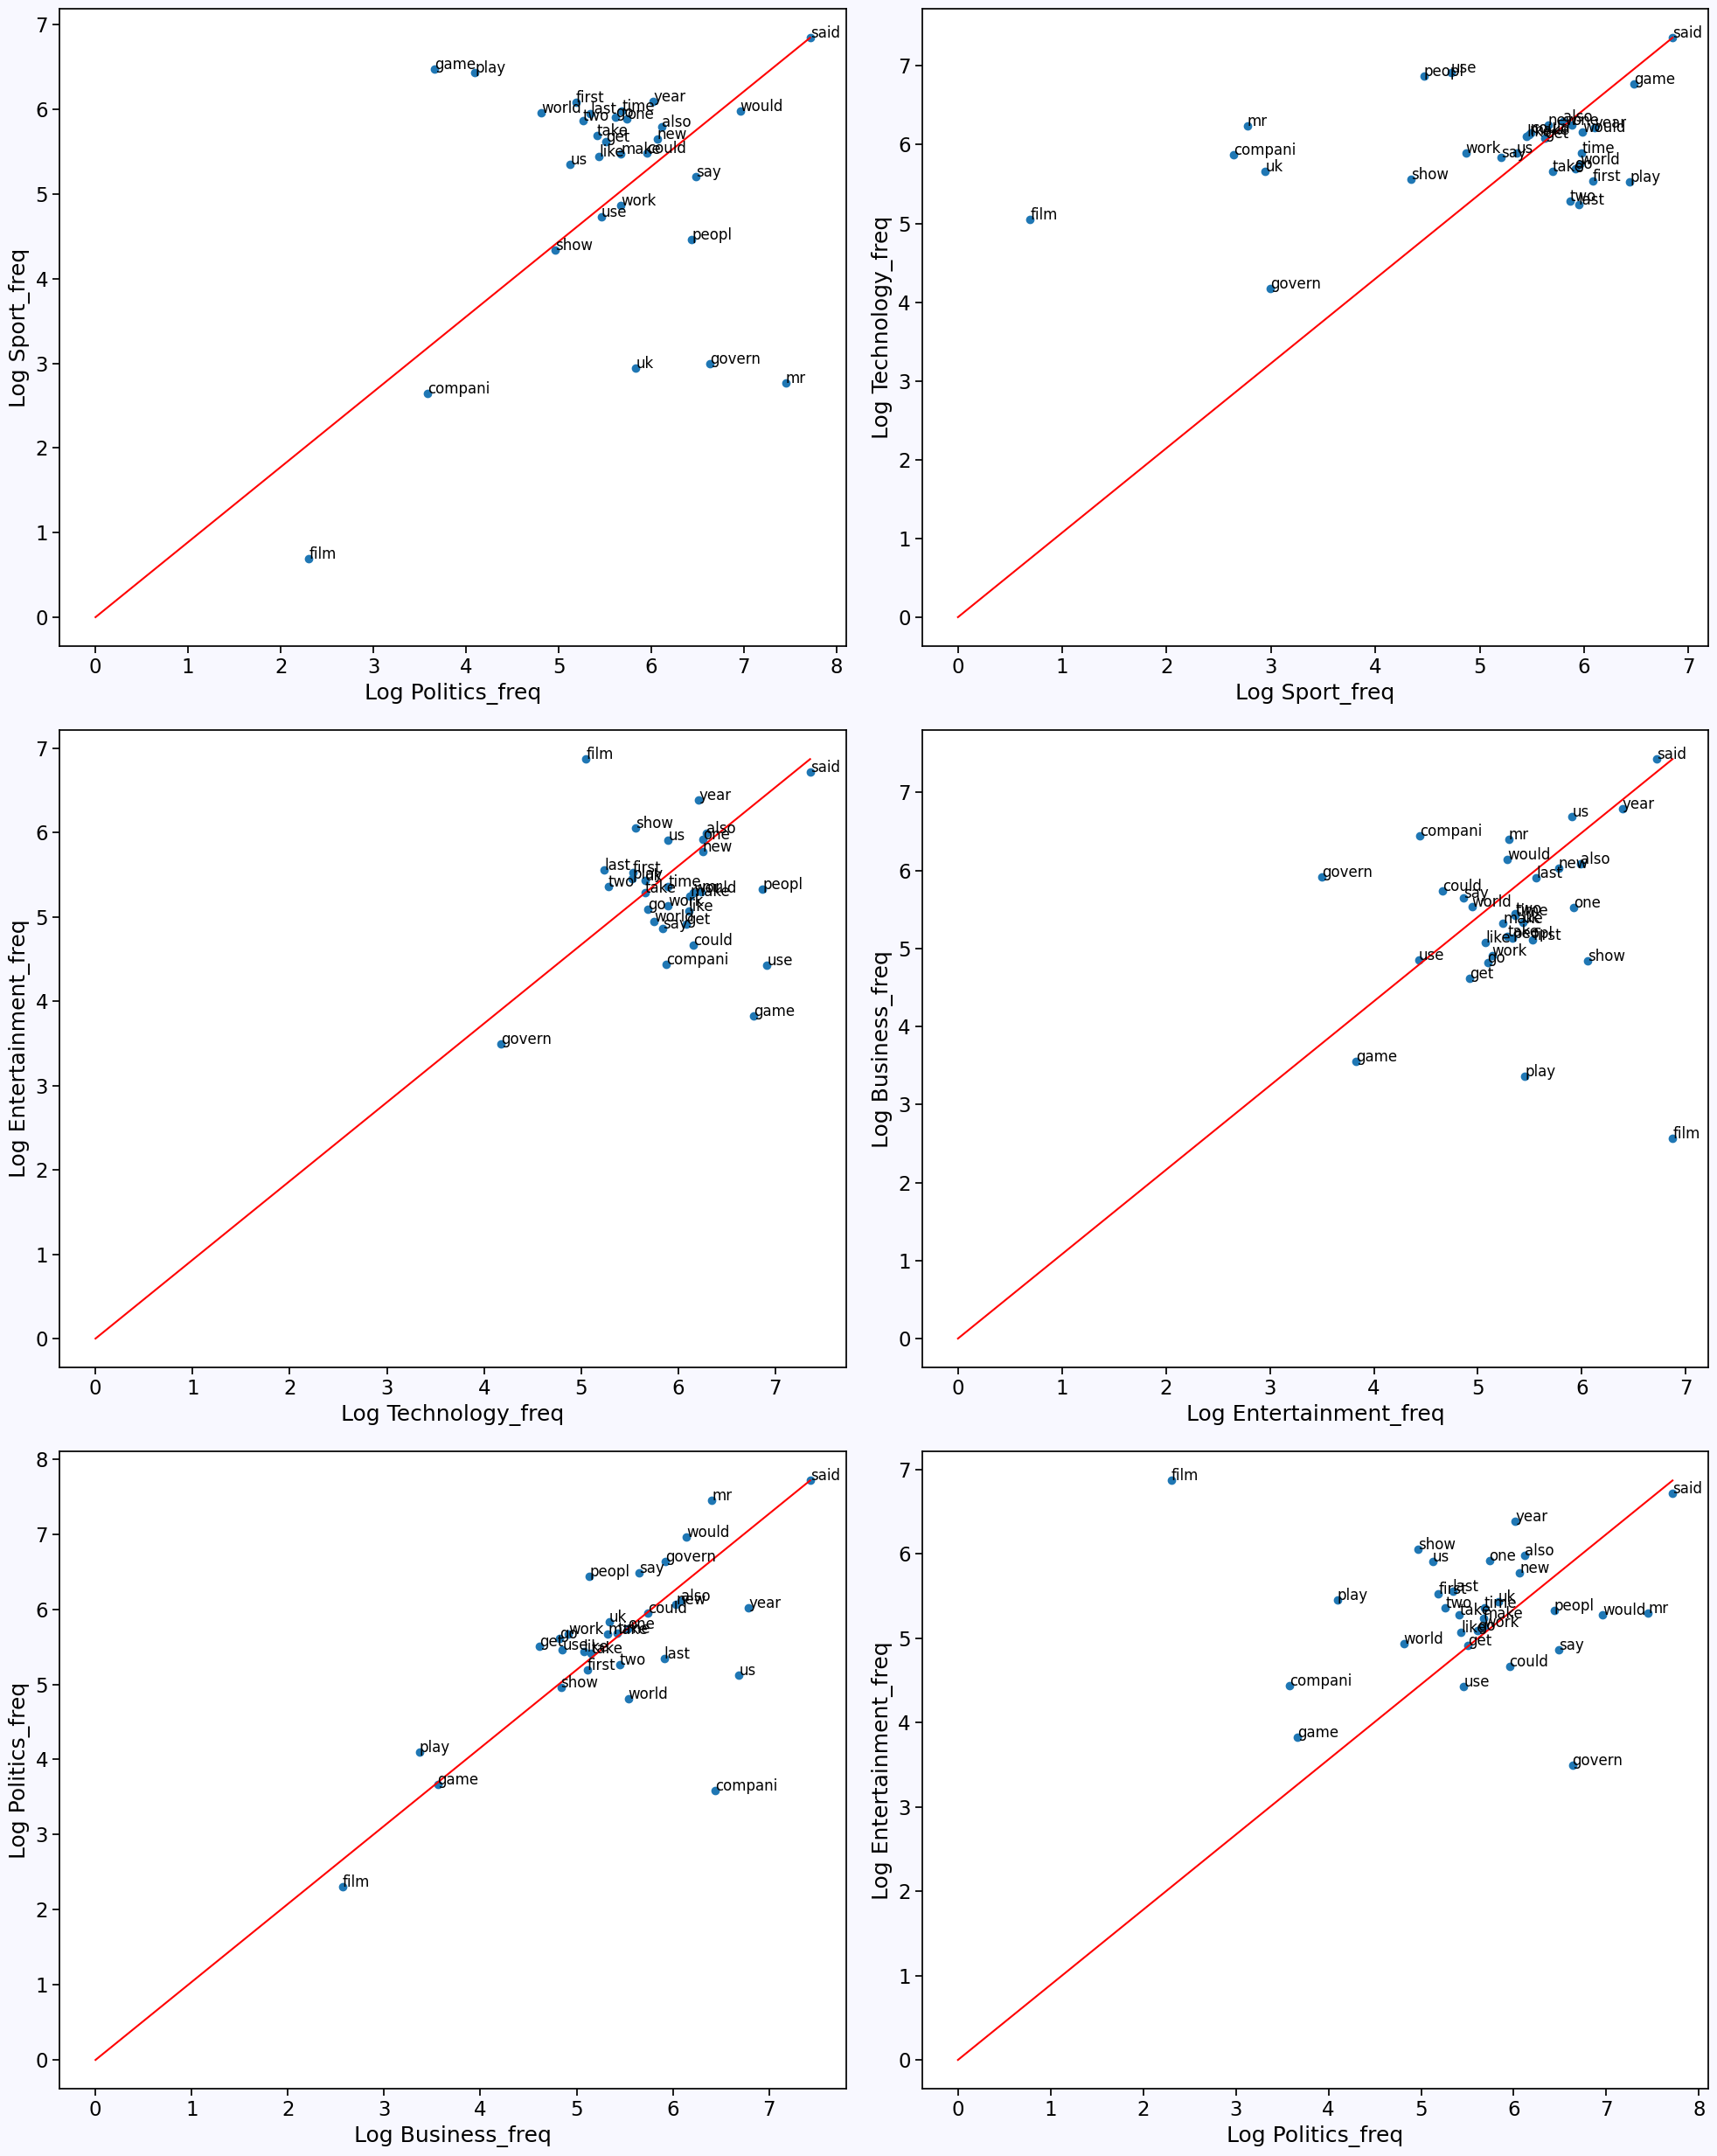

In [ ]:

label_txt("Word Frequencies in Different Categories" ,w = 0.03)

def Visualizing_word_freq(arr_of_top, in1, in2, colname1, colname2, ax):
    x = np.log([x[in1] + 1 for x in arr_of_top])  
    y = np.log([x[in2] + 1 for x in arr_of_top]) 

    ax.scatter(x, y)  
    ax.set_xlabel(f"Log {colname1}")
    ax.set_ylabel(f"Log {colname2}")

    for i in range(0, len(arr_of_top)):
        ax.annotate(arr_of_top[i][0], (x[i], y[i]), fontsize=12)

    ax.plot([0, max(x)], [0, max(y)], color='red') 

fig, axs = plt.subplots(3, 2, figsize=(20, 25))

combinations = [
    (1, 2, "Politics_freq", "Sport_freq"),
    (2, 3, "Sport_freq", "Technology_freq"),
    (3, 4, "Technology_freq", "Entertainment_freq"),
    (4, 5, "Entertainment_freq", "Business_freq"),
    (5, 1, "Business_freq", "Politics_freq"),
    (1, 4, "Politics_freq", "Entertainment_freq")
]

for i, (in1, in2, colname1, colname2) in enumerate(combinations):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    Visualizing_word_freq(arr_of_top_30, in1, in2, colname1, colname2, ax)

plt.tight_layout()
plt.show()

In [ ]:
df["Text_cleaned_count"] = df["Text_cleaned"].str.split().apply(lambda x : len(x))


,Text,Label,label_cat,Text_cleaned,Text_cleaned_count
0,Budget to set scene for election\n \n Gordon B...,0,Politics,budget set scene elect gordon brown seek put e...,314
1,Army chiefs in regiments decision\n \n Militar...,0,Politics,armi chief regiment decis militari chief expec...,273
2,Howard denies split over ID cards\n \n Michael...,0,Politics,howard deni split id card michael howard deni ...,317
3,Observers to monitor UK election\n \n Minister...,0,Politics,observ monitor uk elect minist invit intern ob...,301
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics,kilroy name elect seat target exchat show host...,262
...,...,...,...,...,...
2220,India opens skies to competition\n \n India wi...,4,Business,india open sky competit india allow domest com...,145
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4,Business,yuko bankruptci us matter russian author abid ...,232
2222,Survey confirms property slowdown\n \n Governm...,4,Business,survey confirm properti slowdown govern figur ...,178
2223,High fuel prices hit BA's profits\n \n British...,4,Business,high fuel price hit ba profit british airway b...,265


In [ ]:
df.max()

Text                  iTunes now selling Band Aid song\n \n Ipod own...
Label                                                                 4
label_cat                                                    Technology
Text_cleaned          zambia confid cautiou zambia technic director ...
Text_cleaned_count                                                 2232
dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_words = 25000  
max_len = 150 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Text_cleaned'])


sequences = tokenizer.texts_to_sequences(df['Text_cleaned'])

padded_sequences = pad_sequences(sequences, maxlen=max_len)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Label'], test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(1780, 150)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))  

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          2500000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 150, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 2,580,905
Trainable params: 2,580,905
Non-trainable params: 0
_________________________________________________________________


In [115]:
batch_size = 32
epochs = 5

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5
56/56 [==============================] - 40s 662ms/step - loss: 1.5729 - accuracy: 0.3056 - val_loss: 1.5556 - val_accuracy: 0.4225
Epoch 2/5
56/56 [==============================] - 36s 651ms/step - loss: 1.3422 - accuracy: 0.6073 - val_loss: 1.0721 - val_accuracy: 0.6517
Epoch 3/5
56/56 [==============================] - 36s 640ms/step - loss: 0.6986 - accuracy: 0.7657 - val_loss: 0.6544 - val_accuracy: 0.7888
Epoch 4/5
56/56 [==============================] - 36s 641ms/step - loss: 0.3490 - accuracy: 0.9090 - val_loss: 0.3581 - val_accuracy: 0.9079
Epoch 5/5
56/56 [==============================] - 36s 650ms/step - loss: 0.1609 - accuracy: 0.9596 - val_loss: 0.3290 - val_accuracy: 0.9124


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional


embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(64, activation='relu'))  
model.add(Dense(5, activation='softmax'))  

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

model.summary()





Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          2500000   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 150, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                12864     
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2,673,989
Trainable params: 2,673,989
No

In [ ]:
batch_size = 32
epochs = 7

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = 'best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[model_checkpoint_callback]  
)

Epoch 1/7
56/56 [==============================] - ETA: 0s - loss: 1.5161 - accuracy: 0.3522
Epoch 1: val_accuracy improved from -inf to 0.43371, saving model to best_model.h5
56/56 [==============================] - 69s 1s/step - loss: 1.5161 - accuracy: 0.3522 - val_loss: 1.5043 - val_accuracy: 0.4337
Epoch 2/7
56/56 [==============================] - ETA: 0s - loss: 0.9051 - accuracy: 0.6837
Epoch 2: val_accuracy improved from 0.43371 to 0.74607, saving model to best_model.h5
56/56 [==============================] - 65s 1s/step - loss: 0.9051 - accuracy: 0.6837 - val_loss: 0.8803 - val_accuracy: 0.7461
Epoch 3/7
56/56 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.8461
Epoch 3: val_accuracy did not improve from 0.74607
56/56 [==============================] - 65s 1s/step - loss: 0.5274 - accuracy: 0.8461 - val_loss: 0.7206 - val_accuracy: 0.7169
Epoch 4/7
56/56 [==============================] - ETA: 0s - loss: 0.3355 - accuracy: 0.9253
Epoch 4: val_accuracy

In [ ]:
def classify_text(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=150)
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction)
    return label_map[predicted_label]

In [ ]:
classify_text("my computer was not right")

1/1 [==============================] - 0s 284ms/step


'Technology'

In [ ]:
import io
import json

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
from keras_preprocessing.text import tokenizer_from_json
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)